## Prediction of Heart Disease

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore")

Here we will use 3 Models:

1.KNeighborsClassifier

2.Naive Bayes Classifier

3.RandomForestClassifier

In [2]:
df1 = pd.read_csv('heart.csv')
df1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df1.isna().values.any()

False

In [5]:
df1.isnull().values.any()

False

In [6]:
df1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

<AxesSubplot:xlabel='target', ylabel='count'>

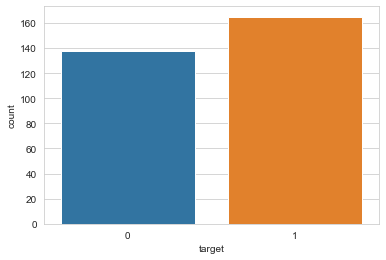

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df1)

Note:
Countplot is used to count the number of people having heart disease and not having heart disease.

0 shows count of person having no heart disease which is less than 140 and 1 shows count of person having heary disease which is more than 160

In [8]:
x1 = df1.drop(columns = ['target'])
y1 = df1[['target']]

In [9]:
x1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal  
count  303.000000  
mean     2.313531  
std      0.612277  
min      0.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [10]:
bestfeatures = SelectKBest(score_func = chi2,k =10 )
fit = bestfeatures.fit(x1,y1)

In [11]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)

In [12]:
featuresScores = pd.concat([dfcolumns,dfscores],axis = 1)

In [13]:
featuresScores.columns = ['Specs','Score']

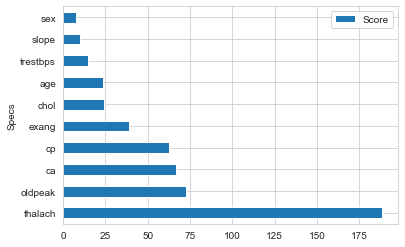

In [14]:
feature_imp = pd.DataFrame(featuresScores.nlargest(10,'Score')).set_index('Specs')
feature_imp.plot(kind = 'barh')
plt.show()

In [15]:
feature_imp

Score
Specs               
thalach   188.320472
oldpeak    72.644253
ca         66.440765
cp         62.598098
exang      38.914377
chol       23.936394
age        23.286624
trestbps   14.823925
slope       9.804095
sex         7.576835

In [16]:
x = df1[['thalach','oldpeak','ca','cp','exang','chol','age','trestbps']]
y = df1[['target']]

The reason to do standard scaling is that there are some features that are having lots of variation and are measured in different units. Whenever we find features that are measured in different units, we should prefer standard scaling because that will help you to rescale/scale down value within same distribution.

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [18]:
columns_to_scale=['age','trestbps', 'chol', 'thalach', 'oldpeak']
x[columns_to_scale] = ss.fit_transform(x[columns_to_scale])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [20]:
x.describe()

thalach       oldpeak          ca          cp       exang  \
count  3.030000e+02  3.030000e+02  303.000000  303.000000  303.000000   
mean  -6.800574e-16  2.345026e-17    0.729373    0.966997    0.326733   
std    1.001654e+00  1.001654e+00    1.022606    1.032052    0.469794   
min   -3.439267e+00 -8.968617e-01    0.000000    0.000000    0.000000   
25%   -7.061105e-01 -8.968617e-01    0.000000    0.000000    0.000000   
50%    1.466343e-01 -2.067053e-01    0.000000    1.000000    0.000000   
75%    7.151309e-01  4.834512e-01    1.000000    2.000000    1.000000   
max    2.289429e+00  4.451851e+00    4.000000    3.000000    1.000000   

               chol           age      trestbps  
count  3.030000e+02  3.030000e+02  3.030000e+02  
mean  -1.113887e-16  4.690051e-17 -7.035077e-16  
std    1.001654e+00  1.001654e+00  1.001654e+00  
min   -2.324160e+00 -2.797624e+00 -2.148802e+00  
25%   -6.814943e-01 -7.572802e-01 -6.638668e-01  
50%   -1.210553e-01  6.988599e-02 -9.273778e-02  
75%    5.456738e-01  7.316189e-01  4.783913e-01  
max    6.140401e+00  2.496240e+00  3.905165e+00

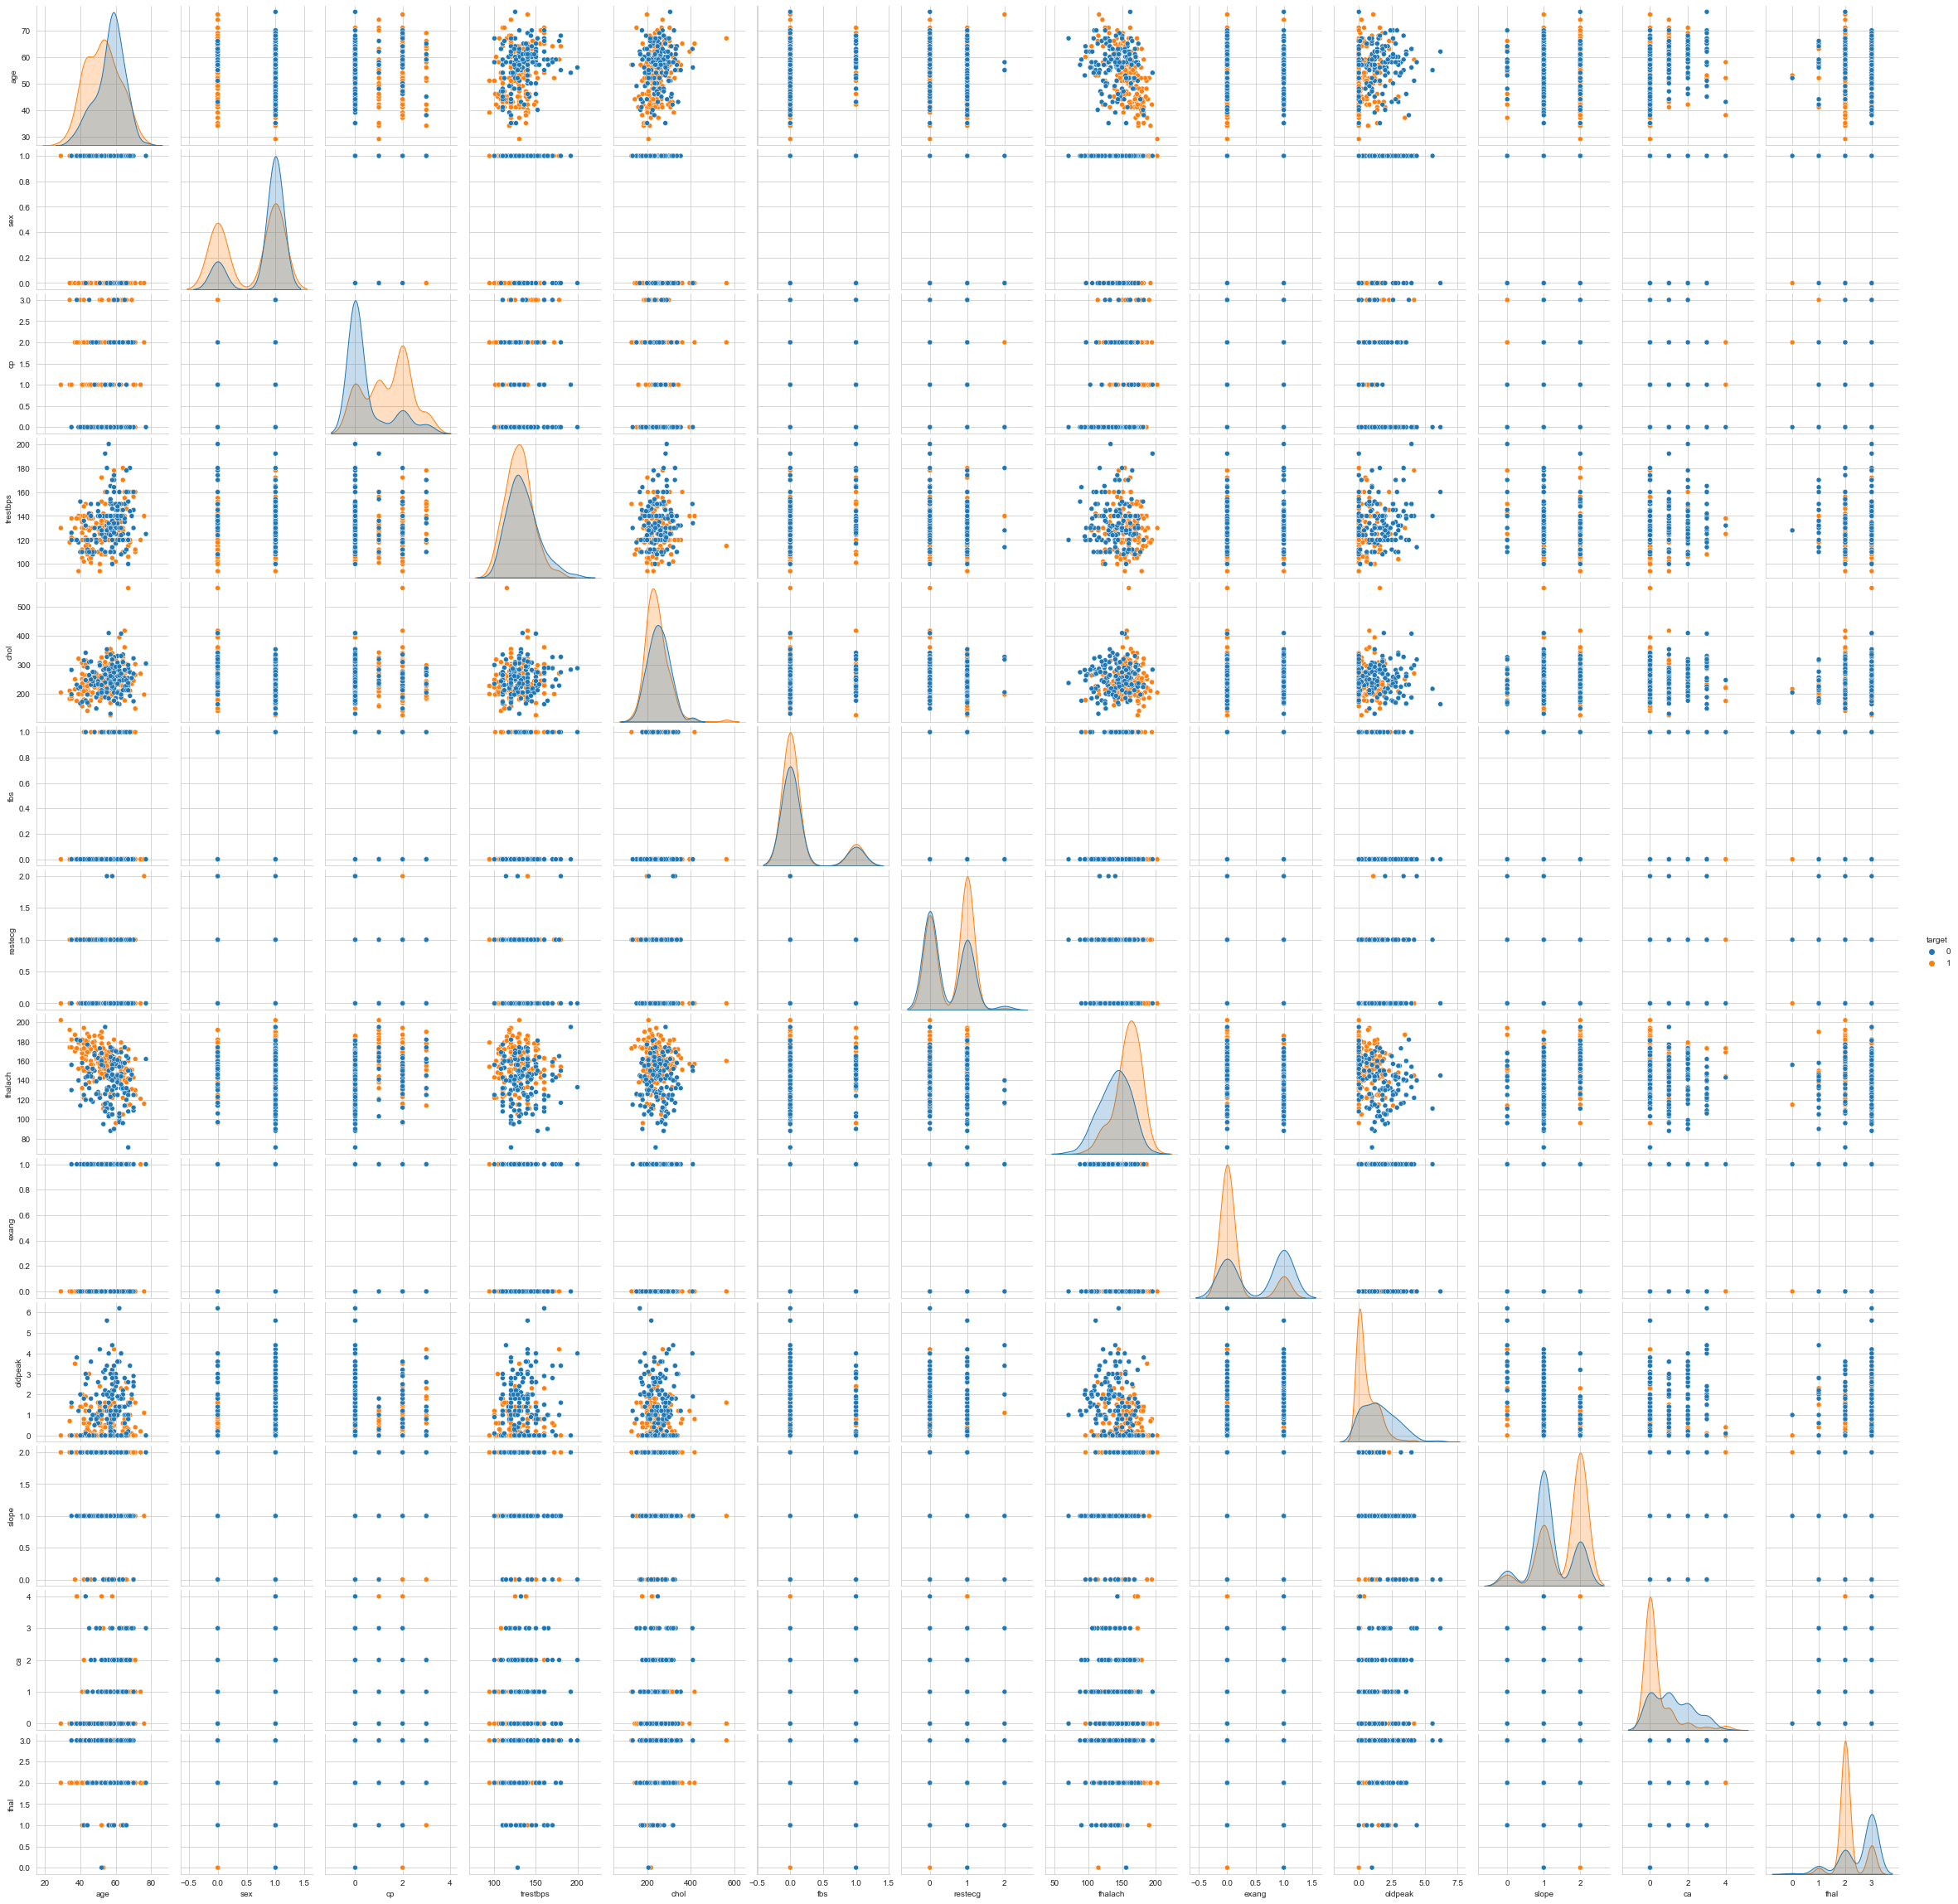

In [21]:
sns.pairplot(df1,hue = 'target')

#### Model-1 Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model4 = GaussianNB()
model4.fit(x_test,y_test)

GaussianNB()

In [24]:
model4.score(x_test,y_test)

0.7912087912087912

#### Model-2 Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 16)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=16)

In [55]:
model2.score(x_test,y_test)

0.8131868131868132

#### Model-3 KNN Classifier

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [28]:
rmse = [] #root mean squared error
score = [] #Score of the model
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,y_predict))
    model_score = knn.score(x_test,y_test)
    score.append(model_score)
    rmse.append(error)

In [29]:
myx = [i for i in range(1,10)]

#### Root Mean Squared Error

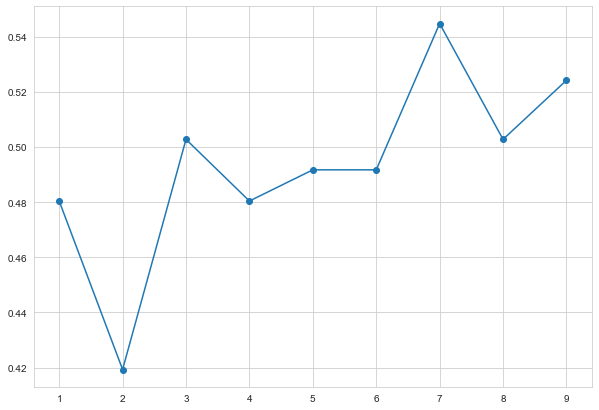

In [30]:
plt.figure(figsize = (10,7))
plt.plot(myx,rmse,marker = "o")

#### Score of Model for each K value

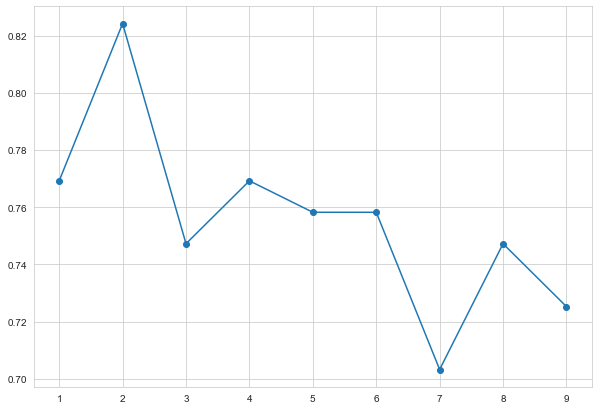

In [31]:
plt.figure(figsize = (10,7))
plt.plot(myx,score,marker = "o")

In [32]:
model3 = KNeighborsClassifier(n_neighbors= 2)
model3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [33]:
model3.score(x_test,y_test)

0.8241758241758241

#### Model Scores:
1. Naive Bayes : 79%
2. Random Forest : 81%
3. K nearest neighbors : 82%